## Handwritten img classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow import keras
import pandas as pd

In [2]:
a = keras.datasets.mnist.load_data()

In [3]:
a

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
df= pd.DataFrame(a)  ## maybe not legible coz it has images

In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape  ##pixel of img

(28, 28)

In [9]:
X_train[0]            ##image 0-255 , 0 rep black 1 rep white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
print(type(X_train))

<class 'numpy.ndarray'>


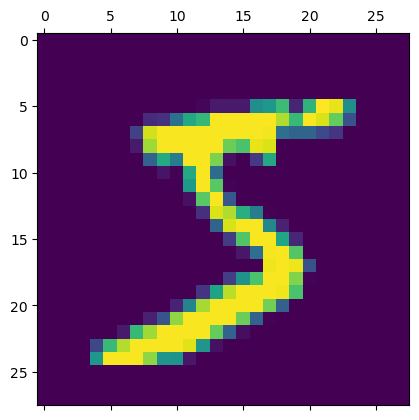

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [13]:
X_train = X_train / 255  ## Normaliztion/standardization just to make dataset less complicated and easy to feed
X_test = X_test / 255      ## ignoring this could result in badly performing model

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
## Flattening would shrink your array, here 3d to 2d
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X_train_flattened.shape

(60000, 784)

In [19]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<img src="digits_nn.jpg" />

### Training & Testing

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')   ## 10 the val of imgs
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4639 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9255


In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2686 - accuracy: 0.9251


[0.2685665488243103, 0.9251000285148621]

In [22]:
## Demo of pred
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.15777420e-02, 4.25879733e-07, 3.96562889e-02, 9.62981641e-01,
       2.17251386e-03, 1.06686726e-01, 1.29412138e-06, 9.99824524e-01,
       6.36668801e-02, 5.97397447e-01], dtype=float32)

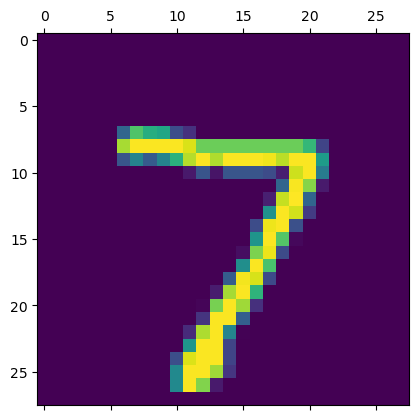

In [23]:
plt.matshow(X_test[0])

In [24]:
## np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])     ##phew! predicted it right

7

In [25]:
## saving all _pred inside labels variable 
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [26]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## confusion matrix

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    6,    7,    3,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   6,   12,  921,   18,    9,    4,   13,   11,   34,    4],
       [   3,    1,   18,  929,    0,   25,    2,   12,   13,    7],
       [   1,    3,    2,    2,  913,    0,   13,    5,    9,   34],
       [   8,    3,    2,   38,    9,  776,   19,    6,   26,    5],
       [  12,    3,    6,    1,    7,   11,  914,    2,    2,    0],
       [   1,   10,   21,    7,    5,    0,    0,  963,    1,   20],
       [   9,   16,    5,   31,    9,   29,   10,   13,  844,    8],
       [  11,    7,    1,   11,   27,    7,    0,   28,    5,  912]])>

Text(95.72222222222221, 0.5, 'Truth')

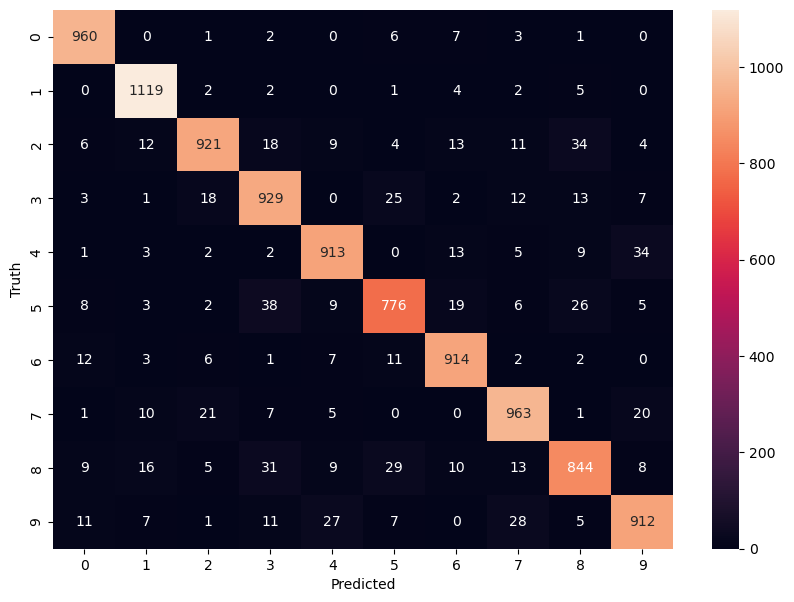

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Exploiting Hidden layers

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), ##100 neurons,1st layyer,10 neurons on 2nd
    keras.layers.Dense(10, activation='sigmoid')   ## 2nd layer,sigmoid->output between 0 and 1, which can be useful for binary 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2718 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1205 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0839 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0651 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9841


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0820 - accuracy: 0.9755


[0.0820467621088028, 0.9754999876022339]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

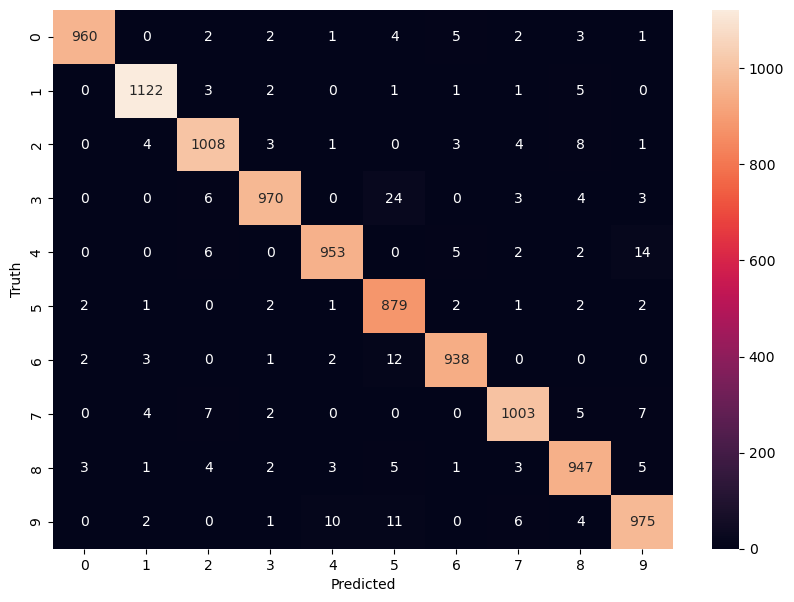

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Tensorboard VIsualization

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), ##100 neurons,1st layyer,10 neurons on 2nd
    keras.layers.Dense(10, activation='sigmoid')   ## 2nd layer,sigmoid->output between 0 and 1, which can be useful for binary 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.fit(X_train_flattened, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2777 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1238 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0525 - accuracy: 0.9837
